In [18]:
import pandas as pd
original  = pd.read_csv('../TOP_ZIPUP_2019.txt', sep = "\n", engine='python', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']

import time
Morph = []
run_time = []

In [19]:
# PyKomoran 불러오기
# from PyKomoran import *
from konlpy.tag import Komoran

# Komoran 객체 생성
komoran = Komoran()

POS_PASSWORD2 = ['NNG', 'NNP', 'NP', 'SL', 'SH', 'NF']
"""
@ REFERENCE: https://komorandocs.readthedocs.io/ko/latest/firststep/postypes.html
NNG: 일반명사
NNP: 고유명사
NP: 대명사
SL: 외국어
SH: 한자
NF: 명사추정범주
"""
def preprocess2(string):
    rst = ""
    try:
        vocab_pos = komoran.pos(string)
        for key, tag in vocab_pos:
            if tag in POS_PASSWORD2:
                rst = rst + key + " "
        return rst
    except: return None


df_Komoran = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    df_Komoran = df_Komoran.append({'text' : preprocess2(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Komoran')
run_time.append(time.time()-start)
df_Komoran.head()


# df_Komoran = pd.DataFrame()
# start = time.time()
# for i in range(len(df)):
#     # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
#     df_Komoran = df_Komoran.append({'text' :
#         komoran.get_morphes_by_tags(df['text'][i], tag_list=POS_PASSWORD2)},
#     ignore_index=True)
# run_time.append(time.time()-start)
# df_Komoran.head()
# """
# # 분석할 문장 준비
# str_to_analyze = "① 대한민국은 민주공화국이다. ② 대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다."

# # get_nouns(): 입력 문장에서 명사만 추출합니다.
# print(komoran.get_nouns(str_to_analyze))
# # # 실행 결과
# # ['대한민국', '민주공화국', '대한민국', '주권', '국민', '권력', '국민']

# # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
# print(komoran.get_morphes_by_tags(str_to_analyze, tag_list=['NNP', 'NNG', 'SF']))
# # # 실행 결과
# # ['대한민국', '민주공화국', '.', '대한민국', '주권', '국민', '권력', '국민', '.']

# # get_plain_text(): 입력 문장 내에 형태소/품사 형태로 태그를 합니다.
# print(komoran.get_plain_text(str_to_analyze))
# # # 실행 결과
# # ①/SW 대한민국/NNP 은/JX 민주공화국/NNP 이/VCP 다/EF ./SF ②/SW 대한민국/NNP 의/JKG 주권/NNP 은/JX 국민/NNG 에게/JKB 있/VV 고/EC ,/SP 모든/MM 권력/NNG 은/JX 국민/NNG 으로부터/JKB 나오/VV ㄴ다/EF ./SF

# # get_token_list(): 입력 문장에 대해서 형태소/품사/시작지점/종료지점을 갖는 Token 자료형들을 반환받습니다.
# print(komoran.get_token_list(str_to_analyze))
# # # 실행 결과
# # [①/SW(0,1), 대한민국/NNP(2,6), 은/JX(6,7), 민주공화국/NNP(8,13), 이/VCP(13,14), 다/EF(14,15), ./SF(15,16), ②/SW(17,18), 대한민국/NNP(19,23), 의/JKG(23,24), 주권/NNP(25,27), 은/JX(27,28), 국민/NNG(29,31), 에게/JKB(31,33), 있/VV(34,35), 고/EC(35,36), ,/SP(36,37), 모든/MM(38,40), 권력/NNG(41,43), 은/JX(43,44), 국민/NNG(45,47), 으로부터/JKB(47,51), 나오/VV(52,54), ㄴ다/EF(53,55), ./SF(55,56)]

# # get_token_list(flatten=False): 입력 문장에 대해서 Token 자료형들을 반환받습니다. 이 때, 어절 단위로 나누어 반환받습니다.
# print(komoran.get_token_list(str_to_analyze, flatten=False))
# # # 실행 결과
# # [[①/SW(0,1)], [대한민국/NNP(2,6), 은/JX(6,7)], [민주공화국/NNP(8,13), 이/VCP(13,14), 다/EF(14,15), ./SF(15,16)], [②/SW(17,18)], [대한민국/NNP(19,23), 의/JKG(23,24)], [주권/NNP(25,27), 은/JX(27,28)], [국민/NNG(29,31), 에게/JKB(31,33)], [있/VV(34,35), 고/EC(35,36), ,/SP(36,37)], [모든/MM(38,40)], [권력/NNG(41,43), 은/JX(43,44)], [국민/NNG(45,47), 으로부터/JKB(47,51)], [나오/VV(52,54), ㄴ다/EF(53,55), ./SF(55,56)]]

# # get_token_list(flatten=False): 입력 문장에 대해서 Token 자료형들을 반환받습니다. 이 때, 품사 기호 대신 이름을 사용합니다.
# print(komoran.get_token_list(str_to_analyze, use_pos_name=True))
# # # 실행 결과
# # [①/기타기호(논리수학기호,화폐기호)(0,1), 대한민국/고유 명사(2,6), 은/보조사(6,7), 민주공화국/고유 명사(8,13), 이/긍정 지정사(13,14), 다/종결 어미(14,15), ./마침표,물음표,느낌표(15,16), ②/기타기호(논리수학기호,화폐기호)(17,18), 대한민국/고유 명사(19,23), 의/관형격 조사(23,24), 주권/고유 명사(25,27), 은/보조사(27,28), 국민/일반 명사(29,31), 에게/부사격 조사(31,33), 있/동사(34,35), 고/연결 어미(35,36), ,/쉼표,가운뎃점,콜론,빗금(36,37), 모든/관형사(38,40), 권력/일반 명사(41,43), 은/보조사(43,44), 국민/일반 명사(45,47), 으로부터/부사격 조사(47,51), 나오/동사(52,54), ㄴ다/종결 어미(53,55), ./마침표,물음표,느낌표(55,56)]

# # get_list(): 입력 문장에 대해서 형태소/품사를 갖는 Pair 자료형들을 반환받습니다.
# print(komoran.get_list(str_to_analyze))
# # # 실행 결과
# # [①/SW, 대한민국/NNP, 은/JX, 민주공화국/NNP, 이/VCP, 다/EF, ./SF, ②/SW, 대한민국/NNP, 의/JKG, 주권/NNP, 은/JX, 국민/NNG, 에게/JKB, 있/VV, 고/EC, ,/SP, 모든/MM, 권력/NNG, 은/JX, 국민/NNG, 으로부터/JKB, 나오/VV, ㄴ다/EF, ./SF]

# """

,text
0,나이키 배색 집 업 후 리스 봉봉 빈티지 제품 나이키 배색 집 업 후 리스 가격 사...
1,어 커버 하프 집 업 후 리스 HALF ZIP UP SILKY FLEECE HALF...
2,DAY 남미 배낭여행 볼리비아 데스 로드 리키 리 이동 후 도착 도둑 아이 새벽 숙...
3,Made U 양털 후드 티 털 상품 Made U 양털 후드 티 상품 가격 상품 게시...
4,choiroom 터 틀 원피스 니트 세트 뒷면 이 룸 베스트 상품 배 폴라 기모 배...


In [20]:
run_time

[986.5637881755829]

In [21]:
df_Komoran.to_csv("df_Komoran.csv", header=False, index=False)

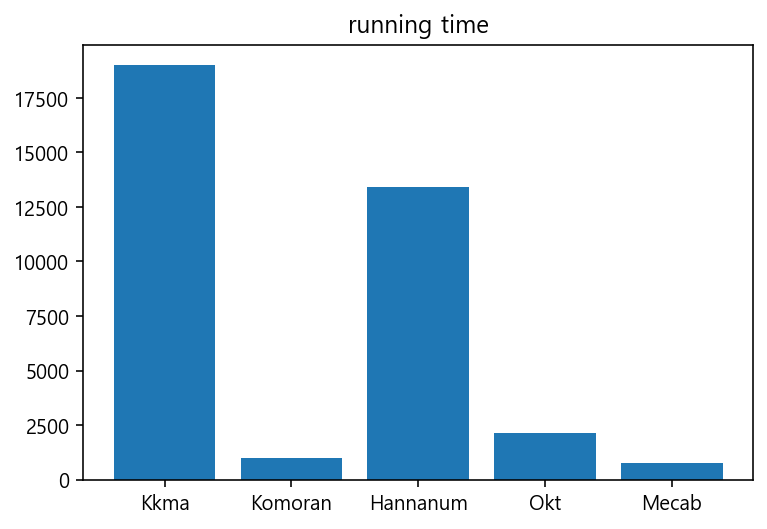

In [25]:
import matplotlib.pyplot as plt
plt.bar(['Kkma', 'Komoran', 'Hannanum', 'Okt', 'Mecab'], 
        [18989.071476221085, 986.5637881755829, 13424.830045700073, 
        2134.6220133304596, 777.9249513149261])
plt.title("running time")
plt.show()

## 시각화

In [23]:
df_Komoran = pd.read_csv("df_Komoran.csv").dropna()

temp = df_Komoran.values.tolist()
list_Komoran = []
for sentence in temp:
    temp2 = sentence[0].split()
    for vocab in temp2:
        list_Komoran.append(vocab)
series_Komoran = pd.Series(list_Komoran)
Komoran_counts = series_Komoran.value_counts()
Komoran_counts

집           91371
업           90831
노           52246
락           51146
아           46139
            ...  
에스카다            1
rei             1
Nomember        1
카미나리            1
care            1
Length: 31027, dtype: int64

<AxesSubplot:title={'center':'Mecab'}>

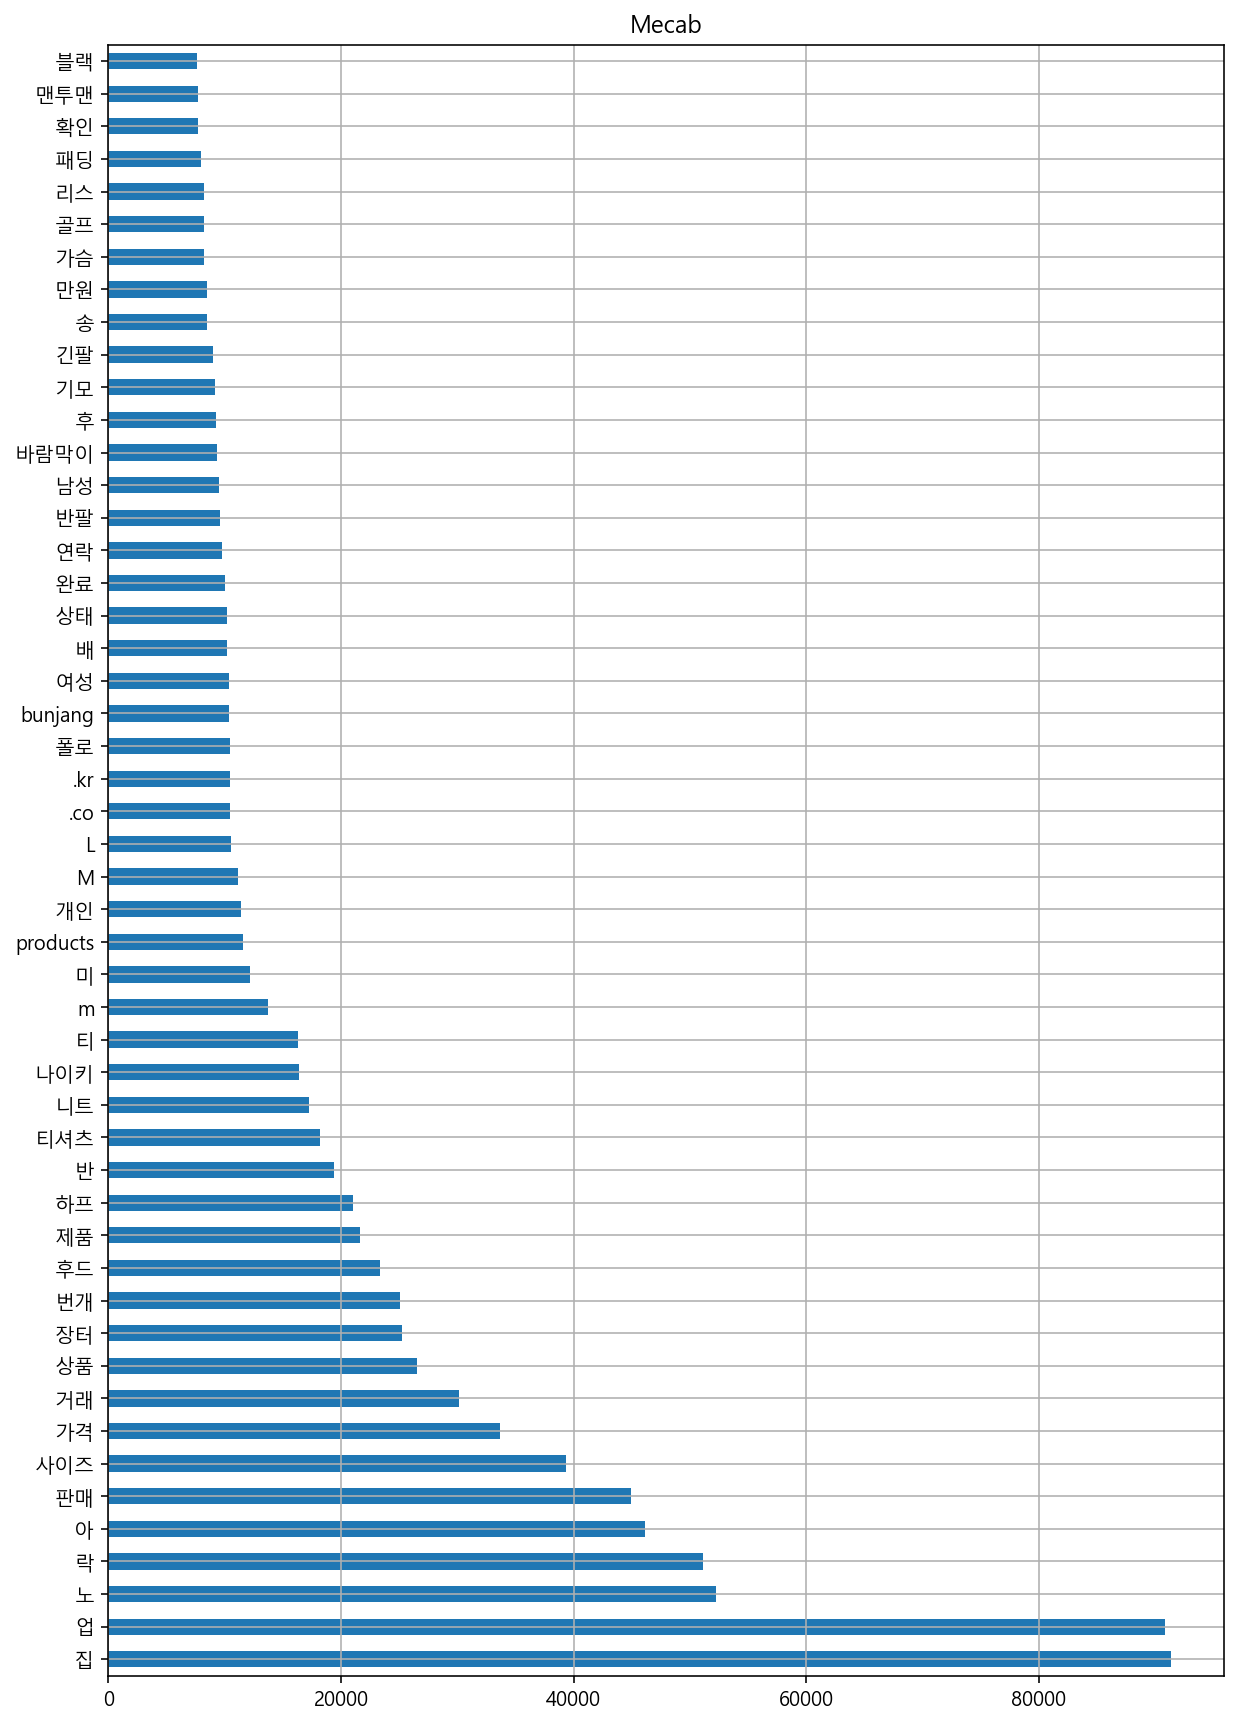

In [24]:
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',family = "Malgun Gothic")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
Komoran_counts.head(50).plot(figsize=(10,15),kind='barh',grid=True, title='Mecab')